In [142]:
import skimage
from skimage import data, img_as_float, img_as_int, exposure, color, io
import numpy as np
from matplotlib import pyplot as plt , colors, cm
from pylab import imread,subplot,imshow,title,gray,figure,show,NullLocator
from mpl_toolkits import axes_grid1
from PIL import Image
import seaborn as sn
from PIL import Image
import requests
from scipy import misc
from skimage import io
import pandas as pd
import libtiff


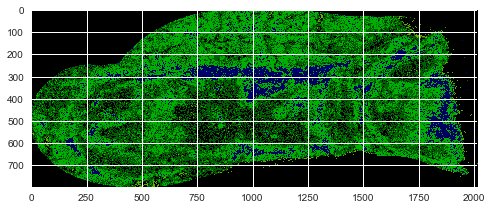

In [143]:
stl1 = io.imread("https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-03_2123-45_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff")
stl2 = io.imread("https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-26_2341-38_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff")
plt.imshow(stl1)
plt.show()

In [144]:
import geopandas as gpd
from geopandas import GeoDataFrame
from pandas import DataFrame
print(type(plt))

<class 'module'>


In [145]:
from shapely.geometry import Point
import matplotlib as mpl


In [146]:
mpl.__version__, pd.__version__, gpd.__version__


('2.0.0', '0.19.2', '0.3.0')

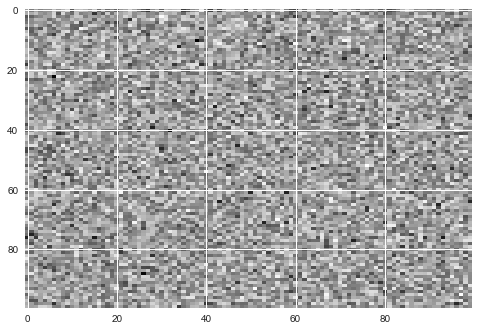

In [147]:
import numpy as np
import matplotlib.pyplot as plt

random = np.random.normal(0,1,size=[100,100])
plt.imshow(random,aspect="auto")
plt.show()

In [148]:
src = np.array(plt)

In [149]:
import rasterio
from scipy import ndimage
import pprint
from rasterio import features

In [150]:
rrblk1050316 = rasterio.open("https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-03_2123-45_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff")
rrblk1052616 = rasterio.open("https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-26_2341-38_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff")

In [151]:

type(rrblk1050316)

rasterio._io.RasterReader

In [152]:

rrblk1050316.name

'https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-03_2123-45_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff'

In [153]:
rrblk1050316.bounds

BoundingBox(left=-122.04039810645062, bottom=38.2114940919924, right=-122.03547697262113, top=38.21344204079991)

In [154]:
rrblk1050316.transform

/Users/boydingalls/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


[-122.04039810645062,
 2.4410386059037547e-06,
 0.0,
 38.21344204079991,
 0.0,
 -2.4410386059037547e-06]

In [155]:
rrblk1050316.crs

CRS({'init': 'epsg:4326'})

In [156]:
rrblk1050316.indexes

(1,)

In [157]:
band1 = rrblk1050316.read(1)
band1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [158]:
band1[rrblk1050316.height // 5, rrblk1050316.width // 2]

93

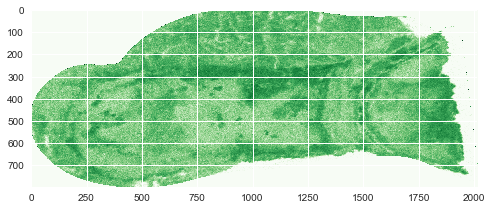

In [159]:
plt.imshow(rrblk1050316.read(1), cmap = 'Greens')
plt.show()

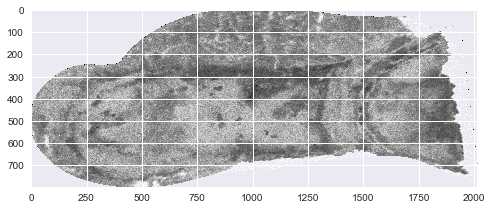

In [160]:
from rasterio.plot import show
show(rrblk1050316)

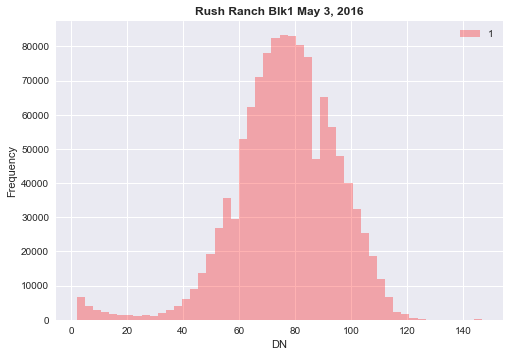

In [161]:
from rasterio.plot import show_hist
show_hist(rrblk1050316, bins = 50, lw = 0.0, stacked = False, alpha = 0.3, histtype = 'stepfilled',
         title = 'Rush Ranch Blk1 May 3, 2016')

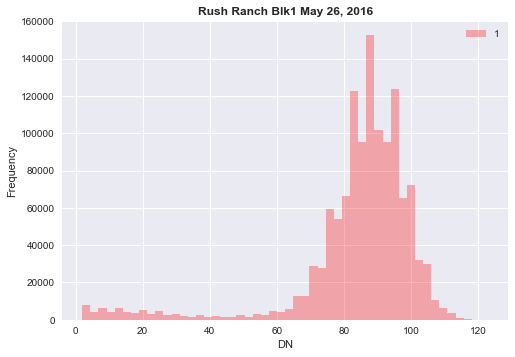

In [162]:

show_hist(rrblk1052616, bins = 50, lw = 0.0, stacked = False, alpha = 0.3, histtype = 'stepfilled',
         title = 'Rush Ranch Blk1 May 26, 2016')

In [163]:
rrblk1050316.bounds, rrblk1052616.bounds

(BoundingBox(left=-122.04039810645062, bottom=38.2114940919924, right=-122.03547697262113, top=38.21344204079991),
 BoundingBox(left=-122.04039810645062, bottom=38.211494004315156, right=-122.03547815912395, top=38.21344204079991))

In [164]:
rrblk1050316.height, rrblk1050316.width, rrblk1052616.height, rrblk1052616.width

(798, 2016, 801, 2023)

In [165]:
from pprint import pprint
import rasterio
import numpy as np

array = rrblk1050316.read()

stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

pprint(stats)

[{'max': 147, 'mean': 57.138038548752832, 'median': 70.0, 'min': 0}]


In [166]:
array = rrblk1052616.read()

stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

pprint(stats)

[{'max': 123, 'mean': 65.752439949321868, 'median': 84.0, 'min': 0}]


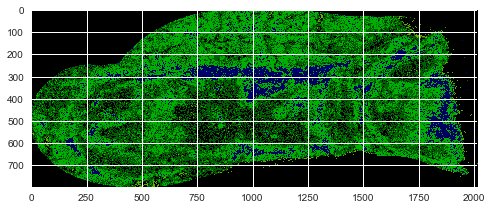

In [167]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data
from skimage.util.dtype import dtype_range
from skimage.util import img_as_ubyte
from skimage import exposure
from skimage.morphology import disk
from skimage.filters import rank
from skimage.external import tifffile

im1 = io.imread("https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-03_2123-45_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff")
im2 = io.imread("https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-03_2123-45_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff")
plt.imshow(im1)
plt.show()


/Users/boydingalls/anaconda/lib/python3.6/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


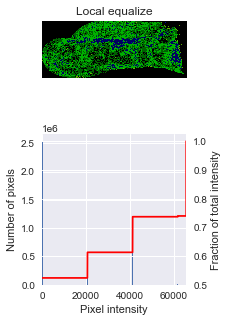

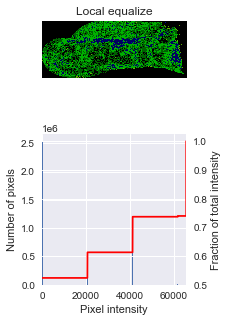

In [168]:

matplotlib.rcParams['font.size'] = 9


def plot_img_and_hist(im1, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_im1, ax_hist = axes
    ax_cdf = ax_hist.twinx()
    ax_im1.imshow(im1, cmap=plt.cm.gray)
    ax_im1.set_axis_off()
    
    ax_hist.hist(im1.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[im1.dtype.type]
    ax_hist.set_xlim(xmin, xmax)
    
    im1_cdf, bins = exposure.cumulative_distribution(im1, bins)
    ax_cdf.plot(bins, im1_cdf, 'r')

    return ax_im1, ax_hist, ax_cdf

im1_rescale = exposure.equalize_hist(im1)

fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1, adjustable='box-forced')

axes[1, 0] = plt.subplot(2, 3, 4)


ax_im1, ax_hist, ax_cdf = plot_img_and_hist(im1, axes[:, 0])
ax_im1.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_im1, ax_hist, #ax_cdf = plot_im1_and_hist(im1_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_im1, ax_hist, #ax_cdf = plot_im1_and_hist(img_eq, axes[:, 2])
ax_im1.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


fig.tight_layout()
plt.show()

def plot_img_and_hist(im2, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_im2, ax_hist = axes
    ax_cdf = ax_hist.twinx()
    ax_im2.imshow(im2, cmap=plt.cm.gray)
    ax_im2.set_axis_off()
    
    ax_hist.hist(im2.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[im2.dtype.type]
    ax_hist.set_xlim(xmin, xmax)
    
    im2_cdf, bins = exposure.cumulative_distribution(im2, bins)
    ax_cdf.plot(bins, im2_cdf, 'r')

    return ax_im2, ax_hist, ax_cdf

im2_rescale = exposure.equalize_hist(im1)

fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1, adjustable='box-forced')

axes[1, 0] = plt.subplot(2, 3, 4)


ax_im2, ax_hist, ax_cdf = plot_img_and_hist(im2, axes[:, 0])
ax_im2.set_title('Low contrast image')
ax_hist.set_ylabel('Number of pixels')

ax_im2, ax_hist, #ax_cdf = plot_im1_and_hist(im1_rescale, axes[:, 1])
ax_img.set_title('Global equalise')

ax_im2, ax_hist, #ax_cdf = plot_im1_and_hist(img_eq, axes[:, 2])
ax_im2.set_title('Local equalize')
ax_cdf.set_ylabel('Fraction of total intensity')


fig.tight_layout()
plt.show()


In [169]:
from skimage import io
from skimage import measure
from skimage import color
from skimage import transform
from skimage.transform import resize

im1 = io.imread("https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-03_2123-45_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff")
im2 = io.imread("https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-26_2341-38_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff")

im1 = color.rgb2gray(im1)
im2 = color.rgb2gray(im2)

#plt.imshow(im2)
#plt.show()

resize(im2,(795, 2010))
resize(im1,(795, 2010))

measure.compare_ssim(im1, im2)

#plt.imshow(im2)
#plt.show()

ValueError: Input images must have the same dimensions.

In [ ]:
from PIL import Image
import urllib.request
im1 = urllib.request.urlopen('https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-03_2123-45_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff')
im2 = urllib.request.urlopen("https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-26_2341-38_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff")


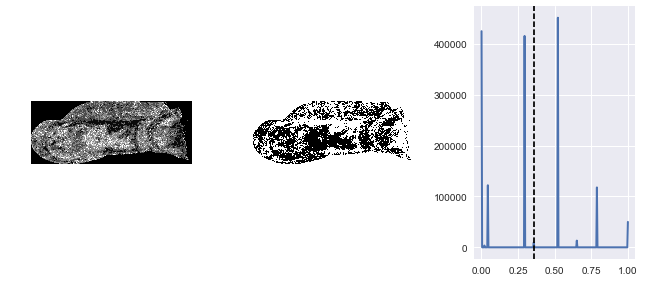

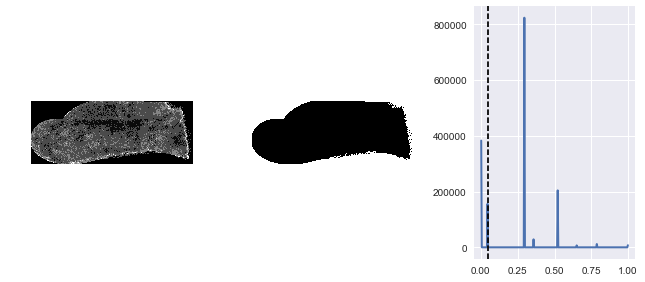

In [170]:
#Otsu thresholding

import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import exposure
im1 = color.rgb2gray(im1)

val = filters.threshold_otsu(im1)

hist, bins_center = exposure.histogram(im1)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(im1, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(im1 < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
from skimage import data
from skimage import filters
from skimage import exposure
im2 = color.rgb2gray(im2)

val = filters.threshold_otsu(im2)

hist, bins_center = exposure.histogram(im2)

plt.figure(figsize=(9, 4))
plt.subplot(131)
plt.imshow(im2, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(132)
plt.imshow(im2 < val, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.subplot(133)
plt.plot(bins_center, hist, lw=2)
plt.axvline(val, color='k', ls='--')

plt.tight_layout()
plt.show()


In [175]:
import numpy as np
from skimage.morphology import watershed
from skimage.feature import peak_local_max
from skimage import measure
from skimage.segmentation import random_walker
import matplotlib.pyplot as plt
from scipy import ndimage
from PIL import Image
import urllib.request
from skimage.filters import threshold_otsu
from skimage import segmentation

mask = im1 > filters.threshold_otsu(im1)
clean_border = segmentation.clear_border(im1)
plt.figure()
plt.imshow(clean_border, cmap='gray')



In [176]:
import matplotlib.pyplot as plt
import rasterio
from scipy import ndimage
import pprint
from rasterio import features

rrblk1050316 = rasterio.open("https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-03_2123-45_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff")
rrblk1052616 = rasterio.open("https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-26_2341-38_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff")

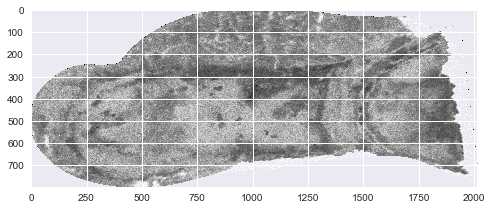

In [179]:
from rasterio.plot import show
show(rrblk1050316)


In [188]:
import rasterio
import numpy

kwargs = rrblk1050316.meta

#kwargs.update(
        #dtype=rasterio.float32,
        #count=1,
        #compress='lzw')


print(kwargs) 

#with rasterio.open(rrblk1050316, 'w', **kwargs) as dst:
        #dst.write_band(1, ndvi.astype(rasterio.float32))

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 2016, 'height': 798, 'count': 1, 'crs': CRS({'init': 'epsg:4326'}), 'transform': (-122.04039810645062, 2.4410386059037547e-06, 0.0, 38.21344204079991, 0.0, -2.4410386059037547e-06), 'affine': Affine(2.4410386059037547e-06, 0.0, -122.04039810645062,
       0.0, -2.4410386059037547e-06, 38.21344204079991)}


In [215]:
from rasterio import rio

rasterio.features.shapes(rrblk1050316)


<generator object shapes at 0x11f5df5c8>

In [218]:
import matplotlib.pyplot as plt
rasterio.plot.plotting_extent(rrblk1050316)

(-122.04039810645062, -122.03547697262113, 38.2114940919924, 38.21344204079991)

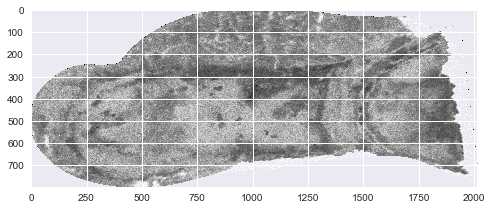

In [219]:
rasterio.plot.show(rrblk1050316)

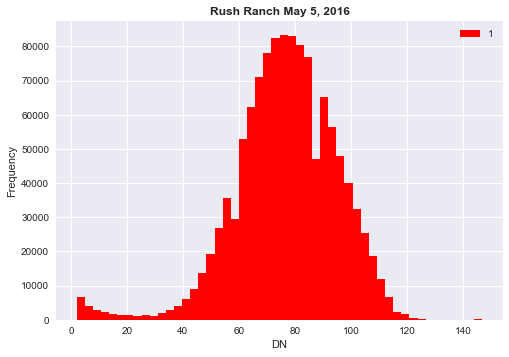

In [225]:
rasterio.plot.show_hist(rrblk1050316, bins = 50, title = "Rush Ranch May 5, 2016")

In [227]:
rasterio.enums.ColorInterp(rrblk1050316)

ValueError: <open RasterReader name='https://s3.amazonaws.com/share-terravion-com/solanolandtrust/2016-05-03_2123-45_a1e2981e-6840-4c4a-b933-bd262b65b485_Rush-Ranch-Block-1_NDVI_N-R3_4326.tiff' mode='r'> is not a valid ColorInterp